# Introduction

## Define the research Question

## Merits of Success

## The context

## Appropriateness of the dataset

# Data understanding

## Import libraries

In [267]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier

# others
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading dataset

In [268]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [269]:
data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

## Checking dataset

In [270]:
data.columns

Index(['age', 'gender', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'ALB', 'AG',
       'selector'],
      dtype='object')

In [271]:
data.head()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [272]:
data.tail()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [273]:
data.shape

(583, 11)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       583 non-null    int64  
 1   gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   AAP       583 non-null    int64  
 5   sgpt      583 non-null    int64  
 6   sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG        579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [275]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [276]:
data.describe()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [277]:
desc = pd.DataFrame(data.dtypes, columns= ['Types'])
desc['Max'] = ''
desc['Min'] = ''
desc['Unique'] = ''
for e , row in desc.iterrows():
  if row['Types'] != 'object':
    desc.loc[e , 'Max'] = data[e].max()
    desc.loc[e , 'Min'] = data[e].min()
    desc.loc[e , 'Unique'] = len(data[e].unique())

# Data Preparation

## Duplicates

In [278]:
data.duplicated().sum()

13

In [279]:
data.drop_duplicates()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [280]:
data.duplicated().sum()

13

## Missing data

In [281]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          4
selector    0
dtype: int64

In [282]:
data = data.dropna()

In [283]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

## Outlier

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

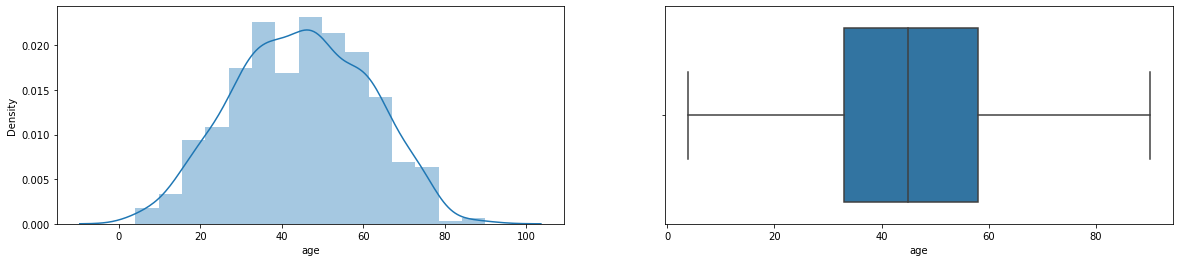

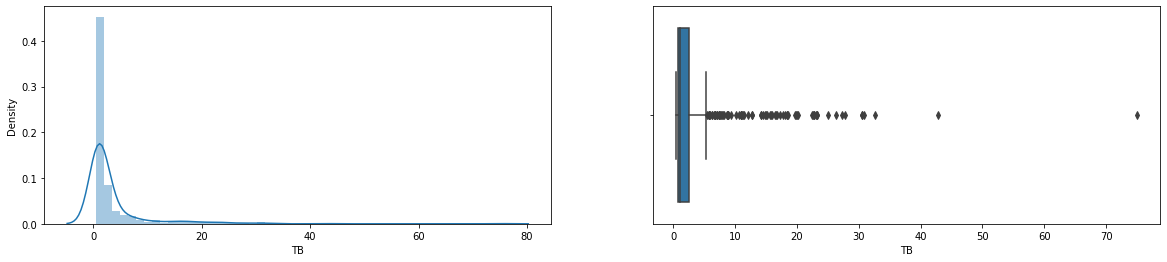

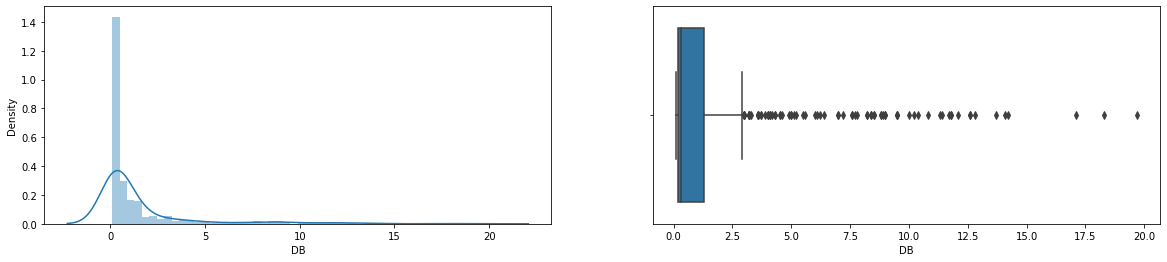

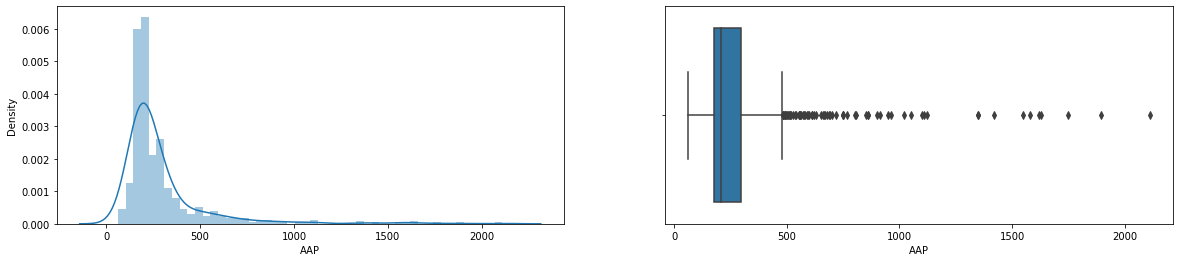

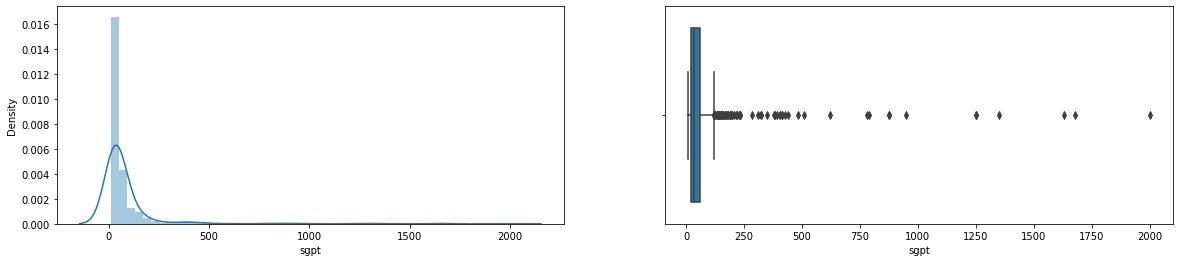

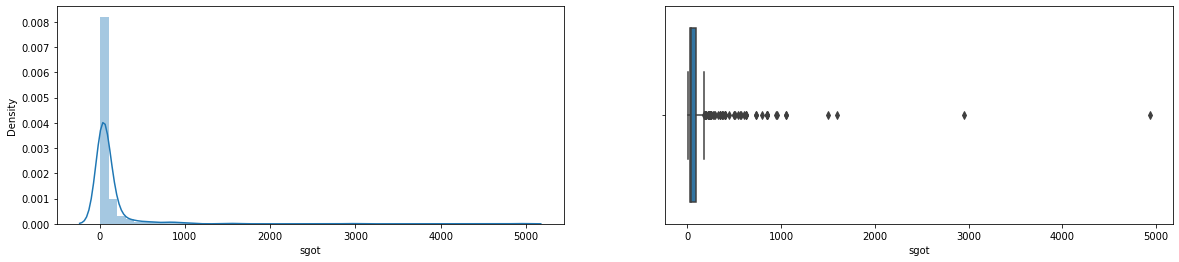

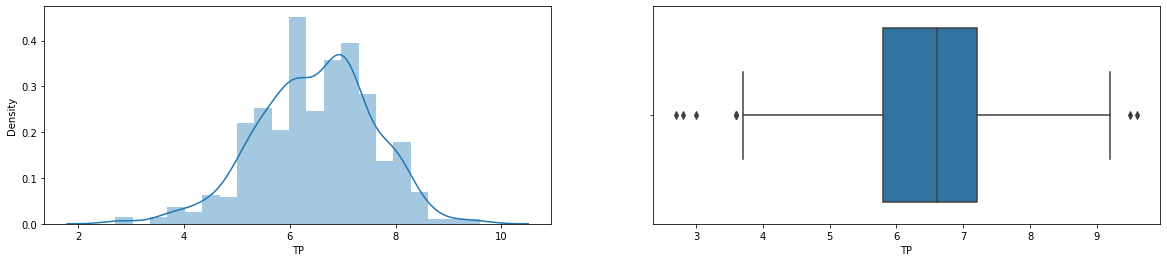

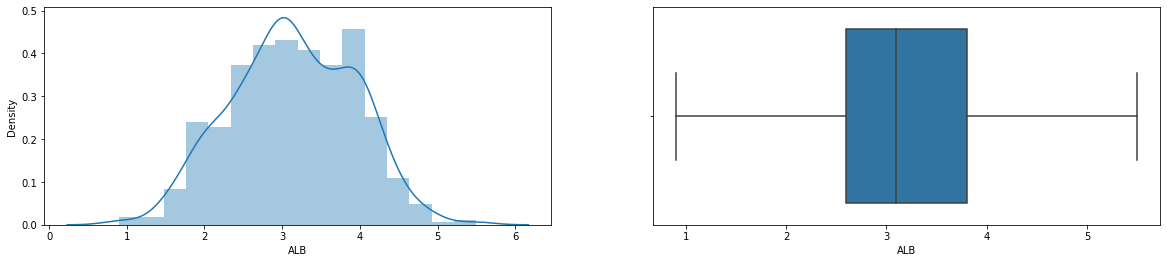

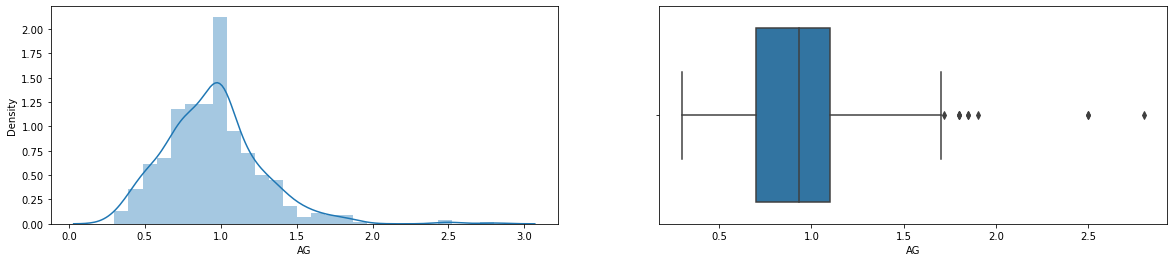

In [284]:
numeric = data.drop(['selector', 'gender'], axis=1)
columns = list(numeric.columns)
for column in columns:
  plo = plt.figure(figsize=(20,4))
  plo.add_subplot(1,2,1)
  sns.distplot(data[column])
  plo.add_subplot(1,2,2)
  sns.boxplot(data[column])

## Adding dummy column

In [285]:
dum = pd.get_dummies(data['gender'])

In [286]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [287]:
sure = sure.drop(['gender','Male'], axis=1)

# Exploratory Data Analysis(EDA)

In [22]:
toeda = sure.copy()

## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


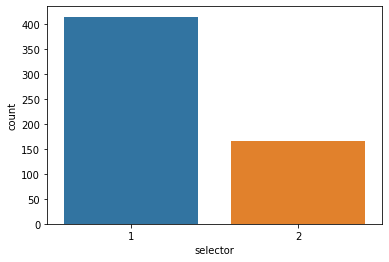

In [23]:
sns.countplot(toeda['selector'])

In [24]:
toeda['selector'].value_counts()

1    414
2    165
Name: selector, dtype: int64

##Distribution vs optimum

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


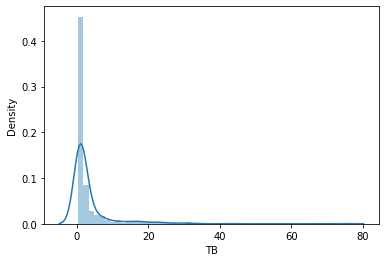

In [25]:
sns.distplot(toeda['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


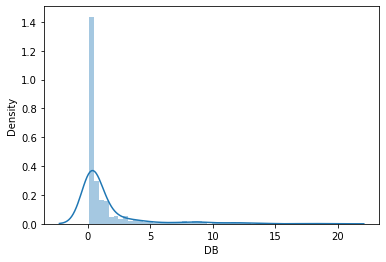

In [26]:
sns.distplot(toeda['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


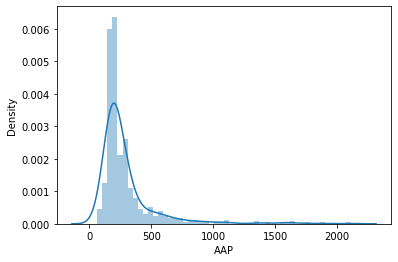

In [27]:
sns.distplot(toeda['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


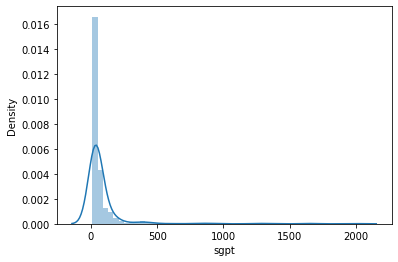

In [28]:
sns.distplot(toeda['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


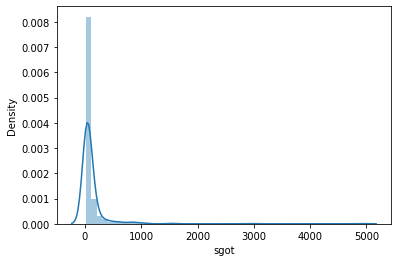

In [29]:
sns.distplot(toeda['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


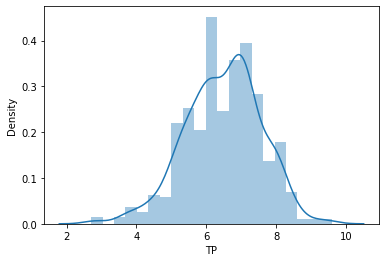

In [30]:
sns.distplot(toeda['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


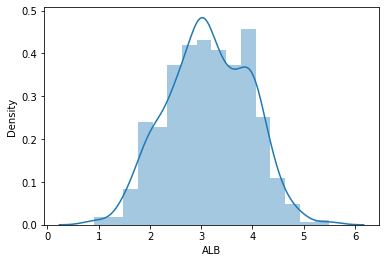

In [31]:
sns.distplot(toeda['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


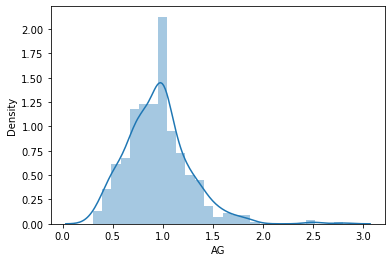

In [32]:
sns.distplot(toeda['AG'])

## Bivariate Analysis

### Correlation

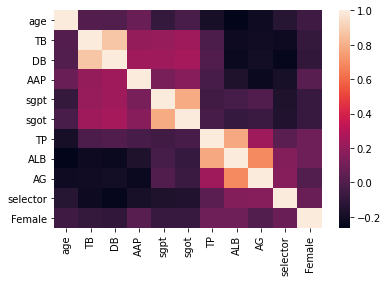

In [33]:
sns.heatmap(toeda.corr())

In [34]:
toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164,-0.055881
TB,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218,-0.088068
DB,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273,-0.099160
AAP,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363,0.029368
sgpt,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117,-0.081339
sgot,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834,-0.079421
TP,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614,0.095149
ALB,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770,0.095579
AG,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131,0.003424
selector,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000,0.081349


# Modelling

## VIF

In [288]:
independent_only = toeda.drop(columns=['selector'])

correlations = independent_only.corr()

correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.055881
TB,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.088068
DB,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.099160
AAP,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,0.029368
sgpt,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.081339
sgot,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.079421
TP,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.095149
ALB,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.095579
AG,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.003424
Female,-0.055881,-0.088068,-0.099160,0.029368,-0.081339,-0.079421,0.095149,0.095579,0.003424,1.000000


In [289]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

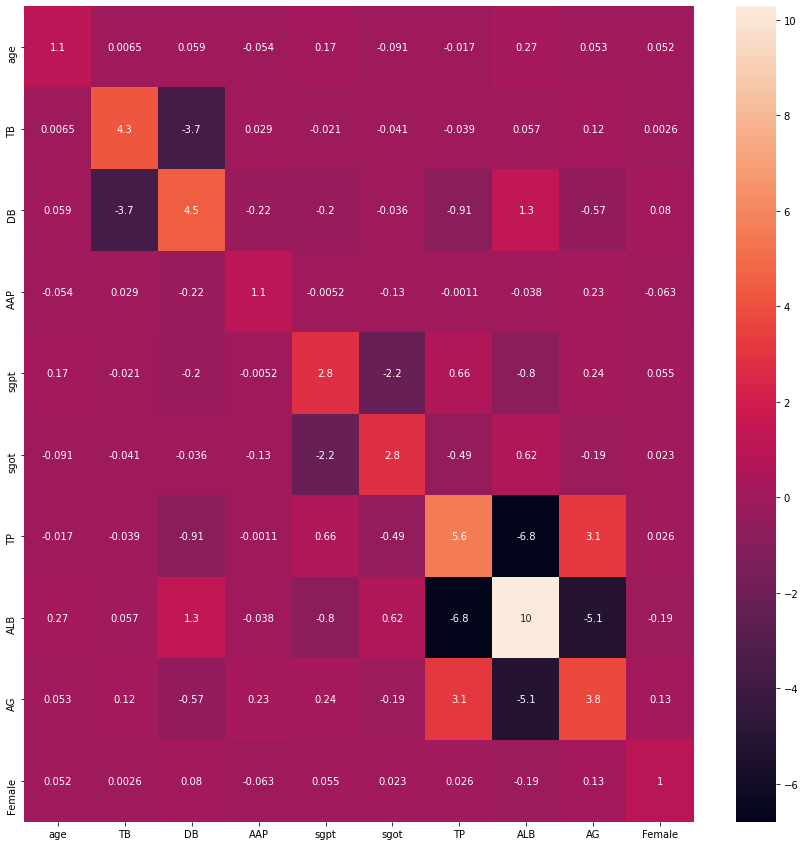

In [290]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

In [291]:
independent_only = independent_only.drop(columns=['ALB'])

correlations = independent_only.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

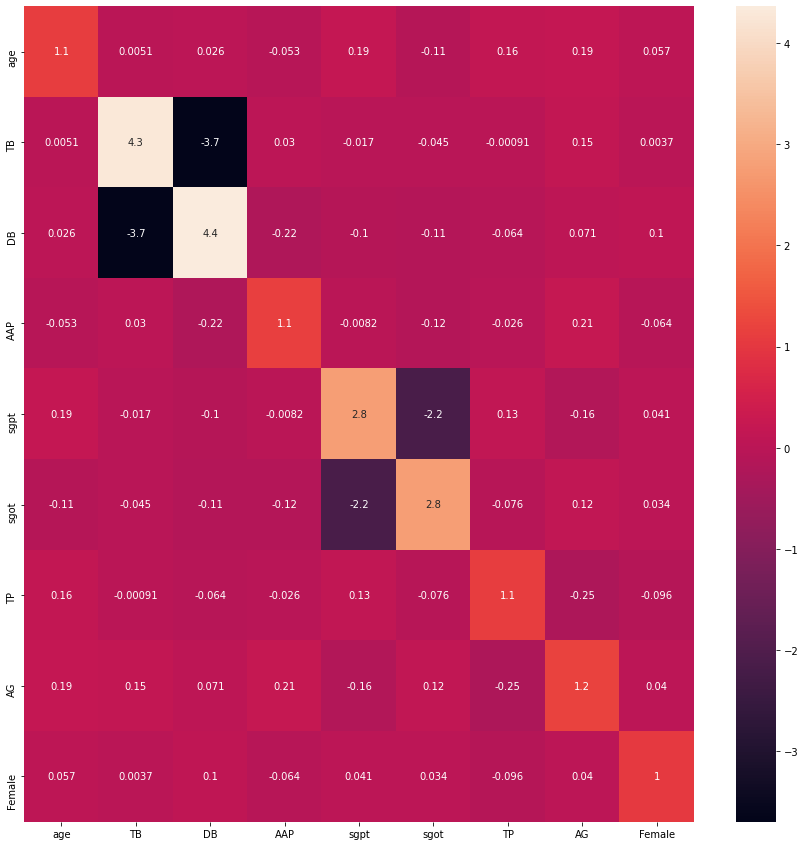

In [292]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

### NB
 - Drop ALB

In [293]:
test_features = independent_only.columns.to_list()

In [294]:
X = independent_only
y = toeda['selector']

In [295]:
a = independent_only.columns

In [296]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [297]:
np.unique(y, return_counts=True)

(array([1, 2]), array([165, 165]))

## Random forest

### Part 1

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

model = forest.fit(x_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [299]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2
 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 2 1 2 2]

Accuracy score: 
 0.6666666666666666

The confusion matrix:
[[25 11]
 [11 19]]

The classification report:
              precision    recall  f1-score   support

           1       0.69      0.69      0.69        36
           2       0.63      0.63      0.63        30

    accuracy                           0.67        66
   macro avg       0.66      0.66      0.66        66
weighted avg       0.67      0.67      0.67        66



#### Feature importance

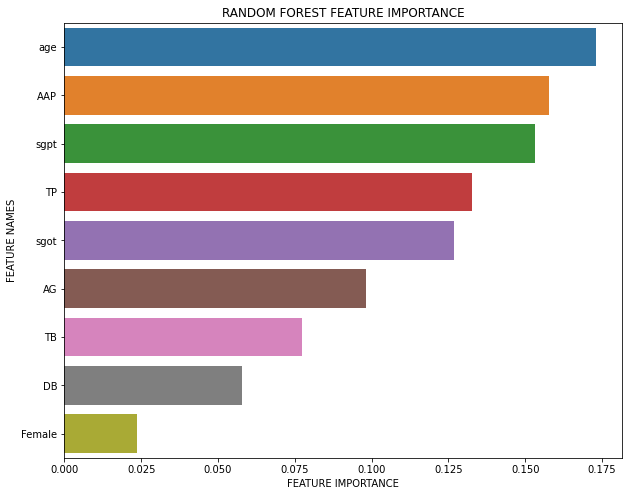

In [300]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

### Part 2

In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = 4, 
                           verbose = 2)

In [332]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 16.1min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 21.0min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 23.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [333]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
par = grid_search.best_params_

max_depth = par['max_depth']
max_features = par['max_features']
min_samples_leaf = par['min_samples_leaf']
min_samples_split = par['min_samples_split']
n_estimators = par['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = n_estimators, 
                               random_state = 42, 
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               max_depth=max_depth)  

model = forest.fit(x_train, y_train)
model

In [301]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2
 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 2 1 2 2]

Accuracy score: 
 0.6666666666666666

The confusion matrix:
[[25 11]
 [11 19]]

The classification report:
              precision    recall  f1-score   support

           1       0.69      0.69      0.69        36
           2       0.63      0.63      0.63        30

    accuracy                           0.67        66
   macro avg       0.66      0.66      0.66        66
weighted avg       0.67      0.67      0.67        66



#### Feature importance

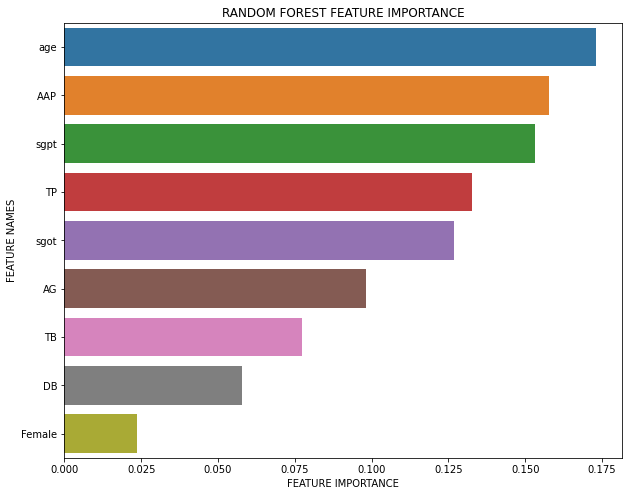

In [302]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

## Ada Boost

### Part 1

In [303]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)) 

model = ada_boost.fit(x_train, y_train)
model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [304]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 2 1 2 2 1 2 1 2 2 2 2 2 2 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 2 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 1]

Accuracy score: 
 0.6212121212121212

The confusion matrix:
[[17 17]
 [ 8 24]]

The classification report:
              precision    recall  f1-score   support

           1       0.68      0.50      0.58        34
           2       0.59      0.75      0.66        32

    accuracy                           0.62        66
   macro avg       0.63      0.62      0.62        66
weighted avg       0.63      0.62      0.62        66



#### Feature importance

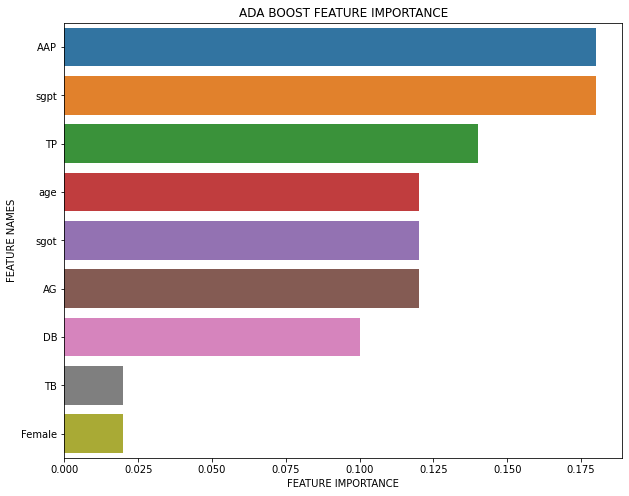

In [305]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

### Part 2

In [305]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate': [0.01,0.05,0.1,0.3,1],
 'algorithm':['SAMME','SAMME.R']
 }

ada=AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, 
                           param_grid=param_dist, 
                           cv = 5)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
par = grid_search.best_params_

learning_rate = par['learning_rate']
algorithm = par['algorithm']
n_estimators = par['n_estimators']

In [ ]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm=algorithm,
                              n_estimators=n_estimators,
                              learning_rate=learning_rate, 
                              random_state=42) 

model = ada_boost.fit(x_train, y_train)
model

In [306]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 2 1 2 2 1 2 1 2 2 2 2 2 2 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 2 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 1]

Accuracy score: 
 0.6212121212121212

The confusion matrix:
[[17 17]
 [ 8 24]]

The classification report:
              precision    recall  f1-score   support

           1       0.68      0.50      0.58        34
           2       0.59      0.75      0.66        32

    accuracy                           0.62        66
   macro avg       0.63      0.62      0.62        66
weighted avg       0.63      0.62      0.62        66



#### Feature importance

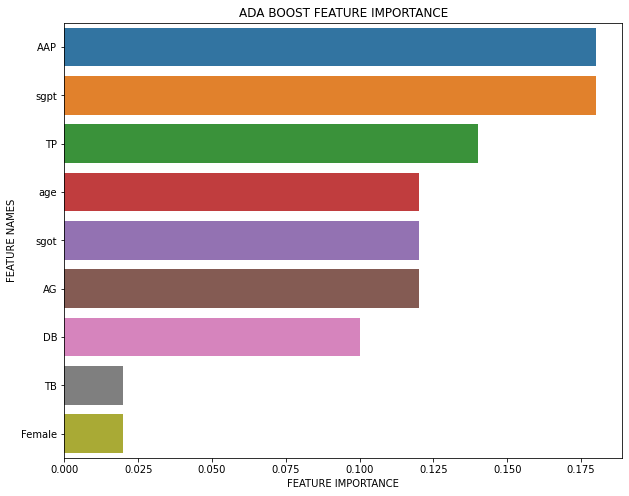

In [307]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'ADA BOOST ')

## Gradient Boost

### Part 1

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

model = clf.fit(x_train, y_train)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [309]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 2
 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2]

Accuracy score: 
 0.5757575757575758

The confusion matrix:
[[33 25]
 [17 24]]

The classification report:
              precision    recall  f1-score   support

           1       0.66      0.57      0.61        58
           2       0.49      0.59      0.53        41

    accuracy                           0.58        99
   macro avg       0.57      0.58      0.57        99
weighted avg       0.59      0.58      0.58        99



#### Feature importance

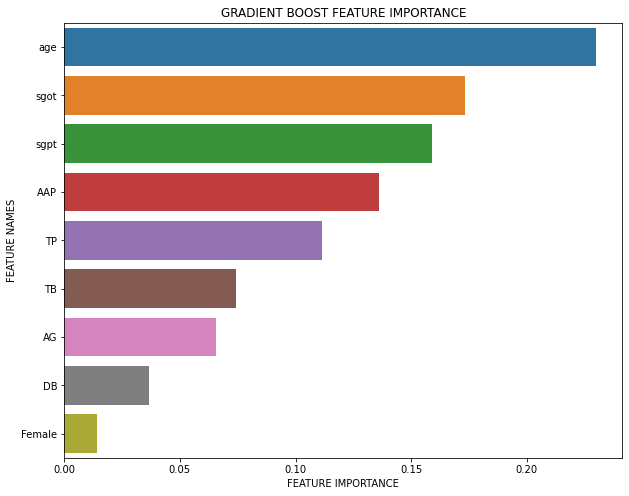

In [310]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

### Part 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

#Creating a grid of hyperparameters
param_dist = {
 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True),
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
 'max_features': ['auto', 'sqrt', 'log2', None],
 'criterion': ['friedman_mse', 'mse', 'mae'],
 'loss': ['deviance', 'exponential']
 }

gf=GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gf, 
                           param_grid=param_dist, 
                           cv = 5)

grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
par = grid_search.best_params_

n_estimators = par['n_estimators']
learning_rate = par['learning_rate']
max_depth = par['max_depth']
min_samples_split = par['min_samples_split']
min_samples_leaf = par['min_samples_leaf']
max_features = par['max_features']
criterion = par['criterion']
loss = par['loss']

In [ ]:
clf = GradientBoostingClassifier(loss=loss, 
                                 learning_rate=learning_rate, 
                                 n_estimators=n_estimators, 
                                 criterion=criterion, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf, 
                                 max_depth=max_depth,   
                                 max_features=max_depth)

model = clf.fit(x_train, y_train)
model

In [311]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 2
 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2]

Accuracy score: 
 0.5757575757575758

The confusion matrix:
[[33 25]
 [17 24]]

The classification report:
              precision    recall  f1-score   support

           1       0.66      0.57      0.61        58
           2       0.49      0.59      0.53        41

    accuracy                           0.58        99
   macro avg       0.57      0.58      0.57        99
weighted avg       0.59      0.58      0.58        99



#### Feature importance

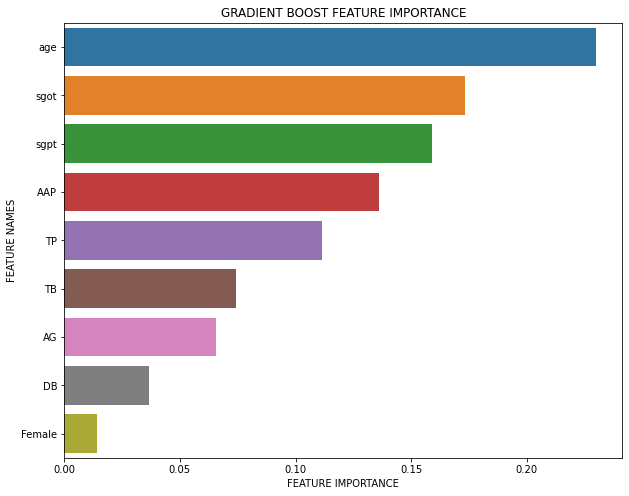

In [312]:
def plot_feature_importance(importance, model_type):

  #Create arrays from feature importance and feature names
  feature_importance = model.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'GRADIENT BOOST ')

## SVM(Polymomial function)

### Part 1

In [313]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly')

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [314]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1]

Accuracy score: 
 0.6464646464646465

The confusion matrix:
[[54  4]
 [31 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.64      0.93      0.76        58
           2       0.71      0.24      0.36        41

    accuracy                           0.65        99
   macro avg       0.67      0.59      0.56        99
weighted avg       0.67      0.65      0.59        99



### Part 2

In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['poly'],
              'degree': [1],
              'degree': [1,2,3,4,5,6,7,8,9,10]
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
degree = par['degree']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
polyclassifier = SVC(C=c,
                     kernel=kernel, 
                     degree=degree, 
                     gamma=gamma,  
                     decision_function_shape=decision_function_shape)

# Training the model using the training set
model = polyclassifier.fit(x_train, y_train)
model

In [315]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1]

Accuracy score: 
 0.6464646464646465

The confusion matrix:
[[54  4]
 [31 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.64      0.93      0.76        58
           2       0.71      0.24      0.36        41

    accuracy                           0.65        99
   macro avg       0.67      0.59      0.56        99
weighted avg       0.67      0.65      0.59        99



## SVM( Radial basis function (rbf))

### Part 1

In [316]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [317]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1]

Accuracy score: 
 0.6666666666666666

The confusion matrix:
[[34  0]
 [22 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        34
           2       1.00      0.31      0.48        32

    accuracy                           0.67        66
   macro avg       0.80      0.66      0.62        66
weighted avg       0.80      0.67      0.62        66



### Part 2

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['rbf'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3)

grid_search.fit(x_train, y_train)            

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
rbfclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = rbfclassifier.fit(x_train, y_train)
model

In [318]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1]

Accuracy score: 
 0.6666666666666666

The confusion matrix:
[[34  0]
 [22 10]]

The classification report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        34
           2       1.00      0.31      0.48        32

    accuracy                           0.67        66
   macro avg       0.80      0.66      0.62        66
weighted avg       0.80      0.67      0.62        66



## SVM(Sigmoid function)

### Part 1

In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [320]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 1 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 2 1 2 2]

Accuracy score: 
 0.4696969696969697

The confusion matrix:
[[11 23]
 [12 20]]

The classification report:
              precision    recall  f1-score   support

           1       0.48      0.32      0.39        34
           2       0.47      0.62      0.53        32

    accuracy                           0.47        66
   macro avg       0.47      0.47      0.46        66
weighted avg       0.47      0.47      0.46        66



### Part 2

In [320]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.fit_transform(x_test)

from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1,1, 10, 100], 
              'gamma': ['scale', 'auto'],
              'kernel': ['sigmoid'],
              'decision_function_shape':['ovo','ovr']}

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           refit = True,
                           verbose = 3,
                           cv=10)

grid_search.fit(x_train, y_train)              

In [ ]:
par = grid_search.best_params_

c = par['C']
decision_function_shape = par['decision_function_shape']
gamma = par['gamma']
kernel = par['kernel']

In [ ]:
# Building the model 
sigclassifier = SVC(C=c,
                    kernel=kernel,  
                    gamma=gamma,  
                    decision_function_shape=decision_function_shape)
# Training the model using the training set
model = sigclassifier.fit(x_train, y_train)
model

In [321]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 1 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 2 1 2 2]

Accuracy score: 
 0.4696969696969697

The confusion matrix:
[[11 23]
 [12 20]]

The classification report:
              precision    recall  f1-score   support

           1       0.48      0.32      0.39        34
           2       0.47      0.62      0.53        32

    accuracy                           0.47        66
   macro avg       0.47      0.47      0.46        66
weighted avg       0.47      0.47      0.46        66



## KNN

### Part 1

In [322]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

model = classifier.fit(x_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [323]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 1 2 1 1 2 2 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 2 2 2 2 1
 1 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1 2 1 1]

Accuracy score: 
 0.5858585858585859

The confusion matrix:
[[35 20]
 [21 23]]

The classification report:
              precision    recall  f1-score   support

           1       0.62      0.64      0.63        55
           2       0.53      0.52      0.53        44

    accuracy                           0.59        99
   macro avg       0.58      0.58      0.58        99
weighted avg       0.58      0.59      0.59        99



### Part 2

In [ ]:
from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [323]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
              }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters) 

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)             

In [ ]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric=metric)

model = classifier.fit(x_train, y_train)
model

In [324]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[2 1 2 1 1 2 2 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 2 2 2 2 1
 1 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1 2 1 1]

Accuracy score: 
 0.5858585858585859

The confusion matrix:
[[35 20]
 [21 23]]

The classification report:
              precision    recall  f1-score   support

           1       0.62      0.64      0.63        55
           2       0.53      0.52      0.53        44

    accuracy                           0.59        99
   macro avg       0.58      0.58      0.58        99
weighted avg       0.58      0.59      0.59        99



## Naive Bayes( Multinomial)

### Part 1

In [325]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

Multinomial = MultinomialNB() 

model = Multinomial.fit(x_train, y_train)
model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [326]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 2 1 1 2 1 1 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1
 2 1 1 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 1 1]

Accuracy score: 
 0.5909090909090909

The confusion matrix:
[[23 11]
 [16 16]]

The classification report:
              precision    recall  f1-score   support

           1       0.59      0.68      0.63        34
           2       0.59      0.50      0.54        32

    accuracy                           0.59        66
   macro avg       0.59      0.59      0.59        66
weighted avg       0.59      0.59      0.59        66



### Part 2

In [ ]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [326]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

parameters = {
  'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],  
}

grid_search = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=parameters,
                           cv=cv)

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

alpha = par['alpha'] 
fit_prior = par['fit_prior']

In [ ]:
Multinomial = MultinomialNB(alpha=alpha, fit_prior=fit_prior) 

model = Multinomial.fit(x_train, y_train)
model

In [327]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 2 1 1 2 1 1 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1
 2 1 1 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 1 1]

Accuracy score: 
 0.5909090909090909

The confusion matrix:
[[23 11]
 [16 16]]

The classification report:
              precision    recall  f1-score   support

           1       0.59      0.68      0.63        34
           2       0.59      0.50      0.54        32

    accuracy                           0.59        66
   macro avg       0.59      0.59      0.59        66
weighted avg       0.59      0.59      0.59        66



## Naive Bayes( Gaussian)

### Part 1

In [328]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 

model = clf.fit(x_train, y_train) 
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [329]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1]

Accuracy score: 
 0.6515151515151515

The confusion matrix:
[[32  2]
 [21 11]]

The classification report:
              precision    recall  f1-score   support

           1       0.60      0.94      0.74        34
           2       0.85      0.34      0.49        32

    accuracy                           0.65        66
   macro avg       0.72      0.64      0.61        66
weighted avg       0.72      0.65      0.62        66



### Part 2

In [ ]:
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

In [329]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB




grid_search = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=parameters, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

grid_search.fit(x_train, y_train)

In [ ]:
par = grid_search.best_params_

var_smoothing = par['var_smoothing'] 

In [ ]:
clf = GaussianNB(var_smoothing=var_smoothing) 

model = clf.fit(x_train, y_train) 
model

In [330]:
y_pred = model.predict(x_test)
print(f'{y_pred}')
print('')
print(f'Accuracy score: \n {accuracy_score(y_test, y_pred)}')
print('')
print('The confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred)}')
print('')
print('The classification report:')
print(f'{classification_report(y_test, y_pred)}')

[1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1]

Accuracy score: 
 0.6515151515151515

The confusion matrix:
[[32  2]
 [21 11]]

The classification report:
              precision    recall  f1-score   support

           1       0.60      0.94      0.74        34
           2       0.85      0.34      0.49        32

    accuracy                           0.65        66
   macro avg       0.72      0.64      0.61        66
weighted avg       0.72      0.65      0.62        66



#A

##Prerequsites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset

In [ ]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     4
10    0
dtype: int64

In [ ]:
data = data[data[9].notna()]

In [ ]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [ ]:
data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

In [ ]:
data.shape

(579, 11)

In [ ]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

In [ ]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [ ]:
desc = pd.DataFrame(data.dtypes, columns= ['Types'])
desc['Max'] = ''
desc['Min'] = ''
desc['Unique'] = ''
for e , row in desc.iterrows():
  if row['Types'] != 'object':
    desc.loc[e , 'Max'] = data[e].max()
    desc.loc[e , 'Min'] = data[e].min()
    desc.loc[e , 'Unique'] = len(data[e].unique())

In [ ]:
desc

,Types,Max,Min,Unique
age,int64,90,4,72
gender,object,,,
TB,float64,75,0.4,113
DB,float64,19.7,0.1,80
AAP,int64,2110,63,262
sgpt,int64,2000,10,152
sgot,int64,4929,10,177
TP,float64,9.6,2.7,58
ALB,float64,5.5,0.9,40
AG,float64,2.8,0.3,69


In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
dum = pd.get_dummies(data['gender'])

In [ ]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [ ]:
sure = sure.drop(['gender','Male'], axis=1)

In [ ]:
sure

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0


In [ ]:
sure.duplicated().sum()

13

In [ ]:
sure.drop_duplicates(inplace= True)

In [ ]:
sure.duplicated().sum()

0

In [ ]:
sure.columns

Index(['age', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'ALB', 'AG', 'selector',
       'Female'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


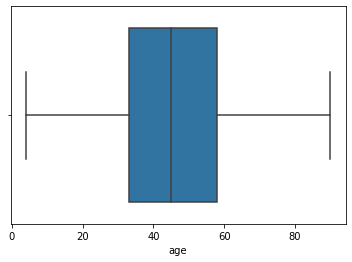

In [ ]:
sns.boxplot(sure['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


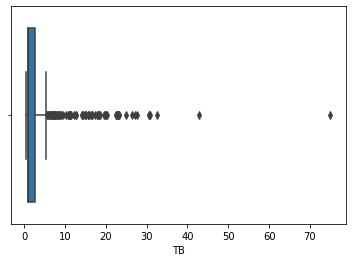

In [ ]:
sns.boxplot(sure['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


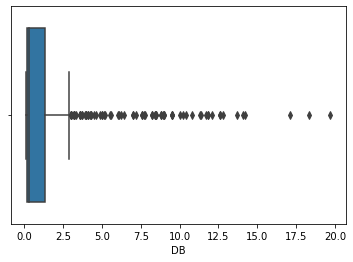

In [ ]:
sns.boxplot(sure['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


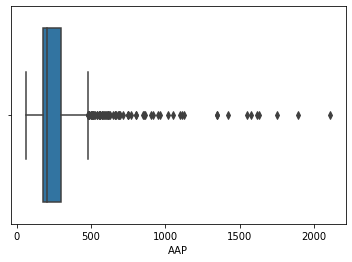

In [ ]:
sns.boxplot(sure['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


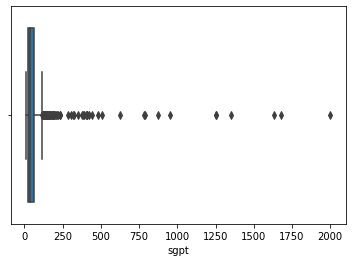

In [ ]:
sns.boxplot(sure['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


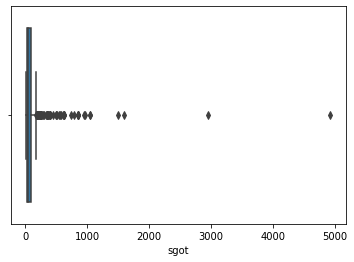

In [ ]:
sns.boxplot(sure['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


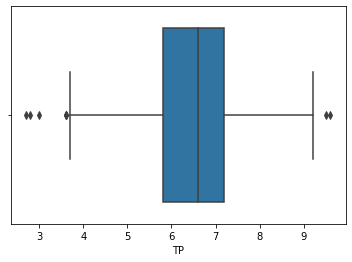

In [ ]:
sns.boxplot(sure['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


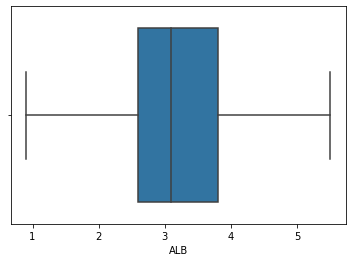

In [ ]:
sns.boxplot(sure['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


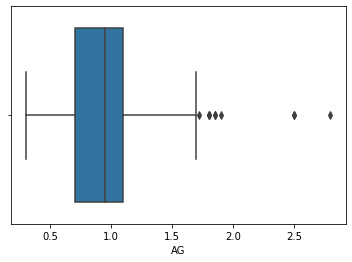

In [ ]:
sns.boxplot(sure['AG'])

## EDA

In [ ]:
toeda = sure.copy()

###For class balance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


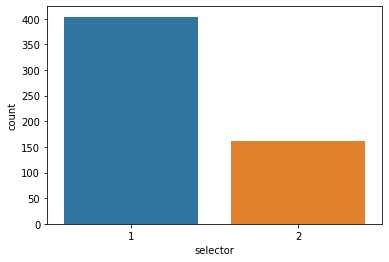

In [ ]:
sns.countplot(toeda['selector'])

In [ ]:
toeda['selector'].value_counts()

1    404
2    162
Name: selector, dtype: int64

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Correlation

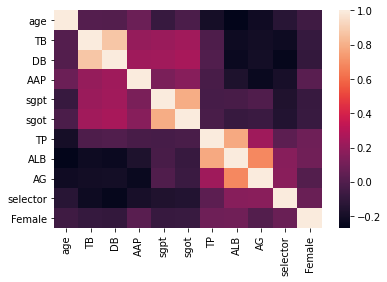

In [ ]:
sns.heatmap(toeda.corr())

In [ ]:
toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402,0.005611
selector,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000,0.077396


### Distribution vs optimum

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


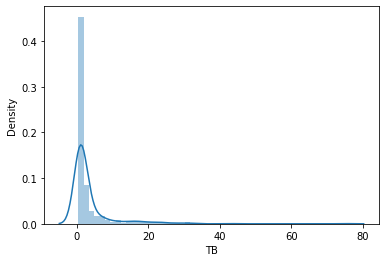

In [ ]:
sns.distplot(toeda['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


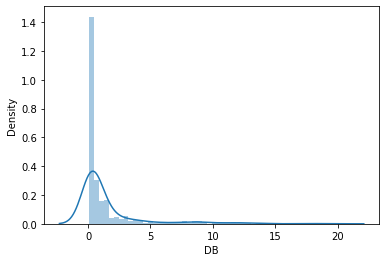

In [ ]:
sns.distplot(toeda['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


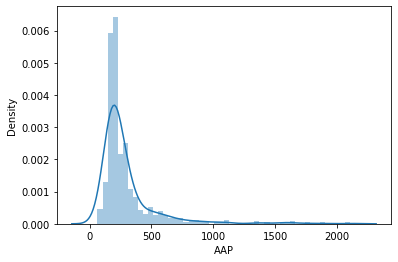

In [ ]:
sns.distplot(toeda['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


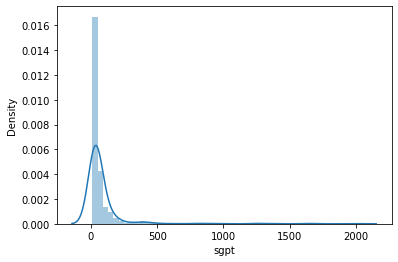

In [ ]:
sns.distplot(toeda['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


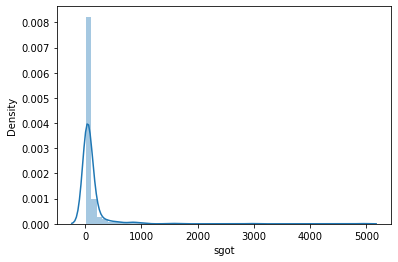

In [ ]:
sns.distplot(toeda['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


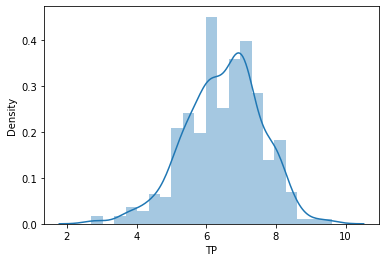

In [ ]:
sns.distplot(toeda['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


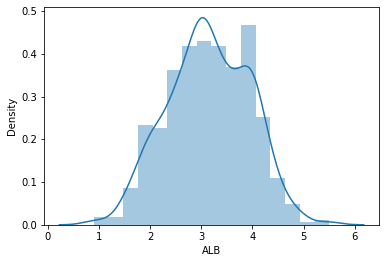

In [ ]:
sns.distplot(toeda['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


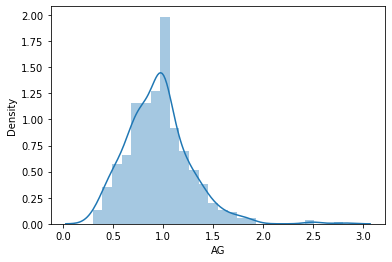

In [ ]:
sns.distplot(toeda['AG'])

##VIF

In [ ]:
# independent_only = data.drop(columns=['Serial No.', 'admit_chance'])

# correlations = independent_only.corr()

# correlations

In [ ]:
# pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [ ]:
correlations = toeda.corr()

In [ ]:
correlations.drop(['selector'], axis=1, inplace=True)
correlations.drop(['selector'], axis=0, inplace=True)

In [ ]:
correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.005611
Female,-0.057542,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,1.000000


In [ ]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

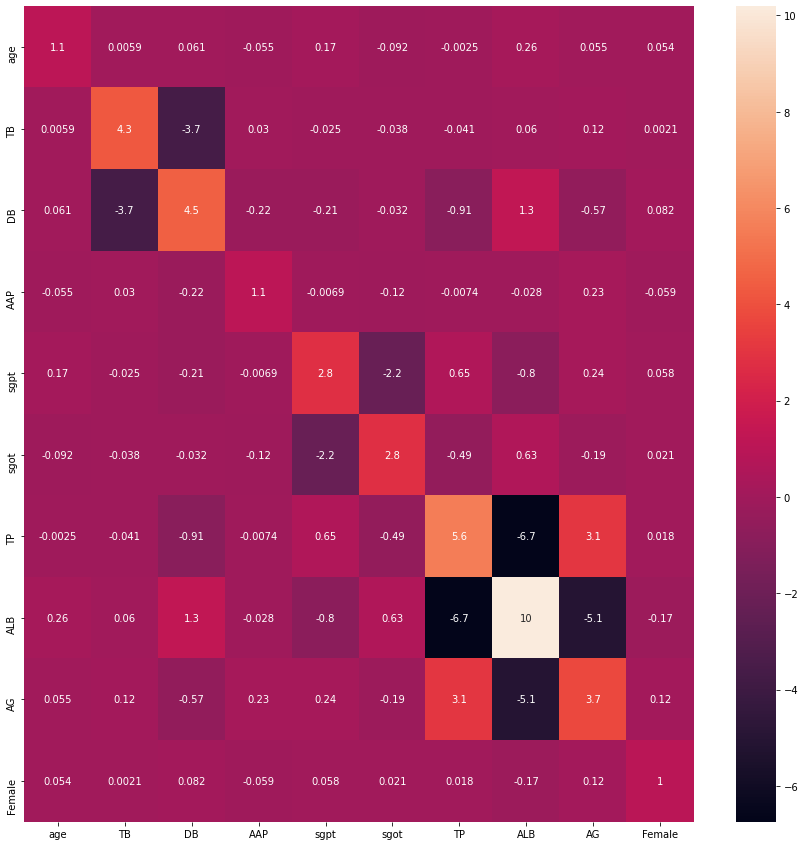

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

In [ ]:
rev = toeda.drop(['ALB','selector'], axis=1)


In [ ]:
correlations = rev.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [ ]:
vif

,age,TB,DB,AAP,sgpt,sgot,TP,AG,Female
age,1.094204,0.004392,0.028029,-0.054116,0.189147,-0.108248,0.168711,0.183529,0.057995
TB,0.004392,4.256879,-3.681829,0.030356,-0.020103,-0.042154,-0.001678,0.147661,0.003072
DB,0.028029,-3.681829,4.346948,-0.217777,-0.105483,-0.112075,-0.060783,0.070552,0.103114
AAP,-0.054116,0.030356,-0.217777,1.121474,-0.009134,-0.121437,-0.025939,0.213188,-0.059544
sgpt,0.189147,-0.020103,-0.105483,-0.009134,2.755336,-2.149684,0.117533,-0.153296,0.045137
sgot,-0.108248,-0.042154,-0.112075,-0.121437,-2.149684,2.769122,-0.070594,0.120811,0.031625
TP,0.168711,-0.001678,-0.060783,-0.025939,0.117533,-0.070594,1.100568,-0.244321,-0.091732
AG,0.183529,0.147661,0.070552,0.213188,-0.153296,0.120811,-0.244321,1.199799,0.038214
Female,0.057995,0.003072,0.103114,-0.059544,0.045137,0.031625,-0.091732,0.038214,1.029989


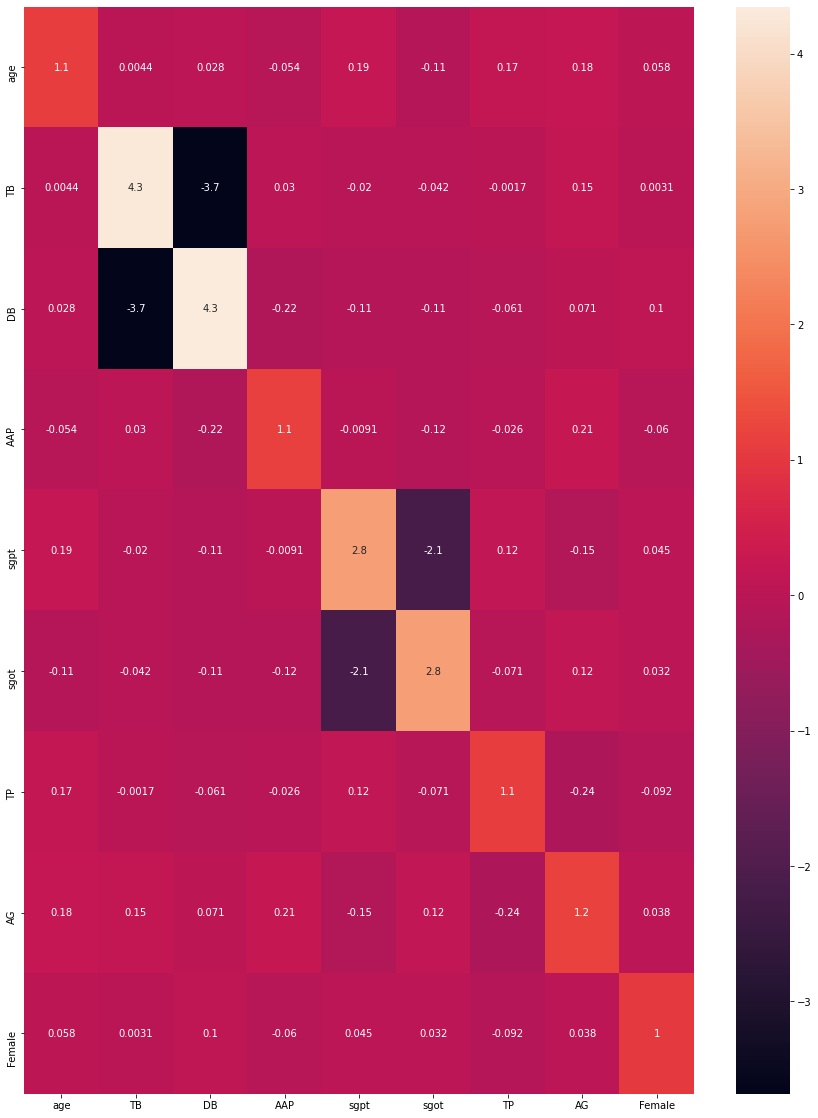

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(vif, annot=True)

plt.show()

### NB
 - Drop ALB

## Models

In [ ]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

In [ ]:
X.columns

Index(['age', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'AG', 'Female'], dtype='object')

In [ ]:
a = X.columns

In [ ]:
y.value_counts()

1    404
2    162
Name: selector, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(y, return_counts=True)

(array([1, 2]), array([162, 162]))

In [ ]:
X

array([[64.  ,  1.1 ,  0.4 , ...,  6.9 ,  1.4 ,  0.  ],
       [33.  ,  1.8 ,  0.8 , ...,  8.  ,  1.  ,  0.  ],
       [34.  ,  0.6 ,  0.1 , ...,  6.6 ,  1.  ,  1.  ],
       ...,
       [50.  ,  1.  ,  0.3 , ...,  7.8 ,  1.  ,  1.  ],
       [60.  ,  0.5 ,  0.1 , ...,  5.9 ,  0.37,  0.  ],
       [38.  ,  1.  ,  0.3 , ...,  7.3 ,  1.5 ,  0.  ]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## RandomForestClassifier

In [ ]:
test_features = data.columns.to_list()
test_features.remove('selector')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = 4, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier() 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.4897959183673469
The confusion matrix:


array([[22, 32],
       [18, 26]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(0,43):
  print(i)
  forest = RandomForestClassifier(n_estimators = 48,
                                  criterion='gini',
                                  random_state = i, 
                                  min_samples_split=4,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  max_depth=4,
                                  class_weight='balanced_subsample'
                                  ) 

  forest = forest.fit(x_train, y_train)
  y_pred = forest.predict(x_test)

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

  

0
Accuracy score of 0.5204081632653061
1
Accuracy score of 0.5
2
Accuracy score of 0.5102040816326531
3
Accuracy score of 0.5102040816326531
4
Accuracy score of 0.5102040816326531
5
Accuracy score of 0.4897959183673469
6
Accuracy score of 0.4897959183673469
7
Accuracy score of 0.4897959183673469
8
Accuracy score of 0.5102040816326531
9
Accuracy score of 0.5306122448979592
10
Accuracy score of 0.5714285714285714
11
Accuracy score of 0.46938775510204084
12
Accuracy score of 0.5510204081632653
13
Accuracy score of 0.5
14
Accuracy score of 0.5408163265306123
15
Accuracy score of 0.5102040816326531
16
Accuracy score of 0.5
17
Accuracy score of 0.47959183673469385
18
Accuracy score of 0.4897959183673469
19
Accuracy score of 0.5612244897959183
20
Accuracy score of 0.5510204081632653
21
Accuracy score of 0.5
22
Accuracy score of 0.4897959183673469
23
Accuracy score of 0.5306122448979592
24
Accuracy score of 0.5204081632653061
25
Accuracy score of 0.46938775510204084
26
Accuracy score of 0.5
27

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 90, 
                               random_state = 42, 
                               min_samples_split= 8,
                               min_samples_leaf= 4,
                               max_features='sqrt',
                               max_depth = 90,
                               class_weight='balanced_subsample',
                               n_jobs = -1
                               ) 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.5
The confusion matrix:


array([[23, 31],
       [18, 26]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.5
The confusion matrix:


array([[23, 31],
       [18, 26]])

In [ ]:
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           1       0.56      0.43      0.48        54
           2       0.46      0.59      0.51        44

    accuracy                           0.50        98
   macro avg       0.51      0.51      0.50        98
weighted avg       0.51      0.50      0.50        98



In [ ]:
X

array([[64.  ,  1.1 ,  0.4 , ...,  6.9 ,  1.4 ,  0.  ],
       [33.  ,  1.8 ,  0.8 , ...,  8.  ,  1.  ,  0.  ],
       [34.  ,  0.6 ,  0.1 , ...,  6.6 ,  1.  ,  1.  ],
       ...,
       [50.  ,  1.  ,  0.3 , ...,  7.8 ,  1.  ,  1.  ],
       [60.  ,  0.5 ,  0.1 , ...,  5.9 ,  0.37,  0.  ],
       [38.  ,  1.  ,  0.3 , ...,  7.3 ,  1.5 ,  0.  ]])

In [ ]:
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
forest.feature_importances_.reshape(-1,1)

array([[0.18854292],
       [0.09498846],
       [0.08138098],
       [0.13002978],
       [0.13284883],
       [0.14734714],
       [0.11756305],
       [0.08323333],
       [0.02406552]])

In [ ]:
def plot_feature_importance(importance,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = forest.feature_importances_
  feature_names = a.values

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
a.to_numpy

<bound method IndexOpsMixin.to_numpy of Index(['age', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'AG', 'Female'], dtype='object')>

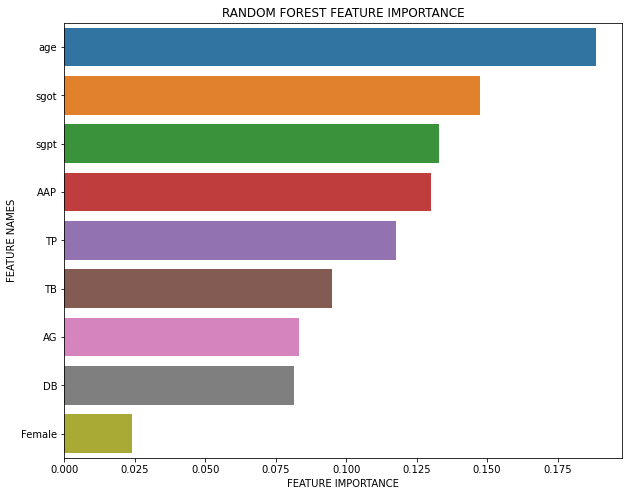

In [ ]:
plot_feature_importance(forest.feature_importances_.reshape(-1,1), 'RANDOM FOREST ')

In [ ]:
b = a.values
b

array(['age', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'AG', 'Female'],
      dtype=object)

In [ ]:
forest.feature_importances_.reshape(-1,1)

array([[0.18854292],
       [0.09498846],
       [0.08138098],
       [0.13002978],
       [0.13284883],
       [0.14734714],
       [0.11756305],
       [0.08323333],
       [0.02406552]])

In [ ]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
re ={'num': [1,2,3,4,5,6,7,8,9],
     'feature': a.values, 
     'importance': forest.feature_importances_}

adaf = pd.DataFrame(re)
adaf

,num,feature,importance
0,1,age,0.188543
1,2,TB,0.094988
2,3,DB,0.081381
3,4,AAP,0.130030
4,5,sgpt,0.132849
5,6,sgot,0.147347
6,7,TP,0.117563
7,8,AG,0.083233
8,9,Female,0.024066


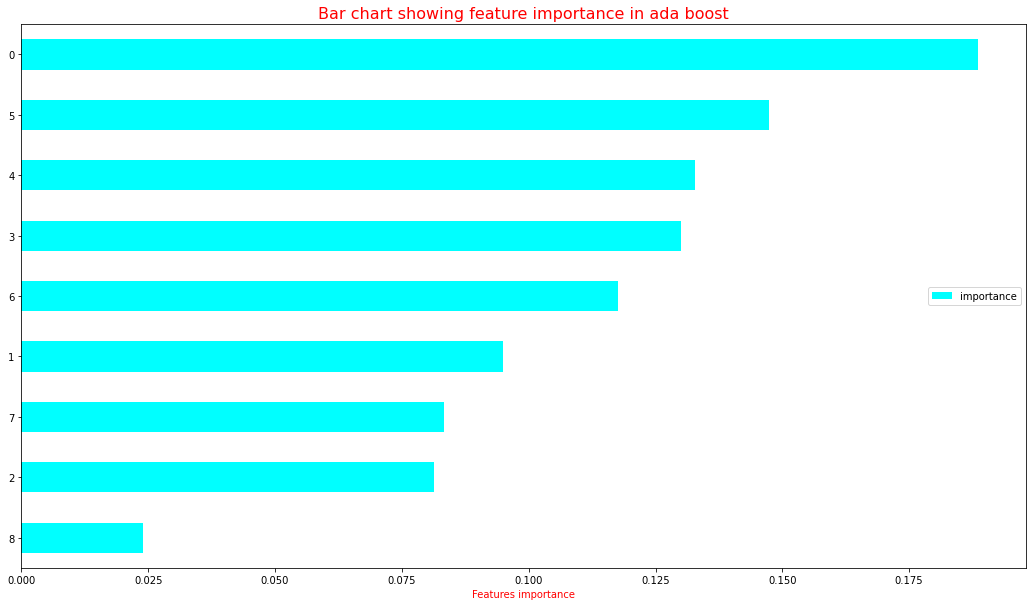

In [ ]:
# Creating a bar chart of feature importance in descending order
#
adaf= adaf[:9].sort_values(by = 'importance', ascending = True)
adaf.plot(kind = 'barh', figsize = (18, 10), color = 'cyan')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance in ada boost', color = 'red', fontsize = 16)
plt.xlabel('Features importance', fontsize = 10, color = 'red')
plt.show()

## FP

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(x_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# KNN
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay Multi
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

In [ ]:
# Naive Bay GU
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
X = X.drop(X[to_drop], axis=1)

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 
model = clf.fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

#Prerequsites

#Dataset

In [ ]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     4
10    0
dtype: int64

In [ ]:
data = data[data[9].notna()]

In [ ]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [ ]:
data.columns = ['age','gender','TB', 'DB' , 'AAP' , 'sgpt' , 'sgot' , 'TP' , 'ALB' , 'AG' , 'selector']

In [ ]:
data.shape

(579, 11)

In [ ]:
data.isnull().sum()

age         0
gender      0
TB          0
DB          0
AAP         0
sgpt        0
sgot        0
TP          0
ALB         0
AG          0
selector    0
dtype: int64

In [ ]:
data.dtypes

age           int64
gender       object
TB          float64
DB          float64
AAP           int64
sgpt          int64
sgot          int64
TP          float64
ALB         float64
AG          float64
selector      int64
dtype: object

In [ ]:
desc

,Types,Max,Min,Unique
age,int64,90,4,72
gender,object,,,
TB,float64,75,0.4,113
DB,float64,19.7,0.1,80
AAP,int64,2110,63,262
sgpt,int64,2000,10,152
sgot,int64,4929,10,177
TP,float64,9.6,2.7,58
ALB,float64,5.5,0.9,40
AG,float64,2.8,0.3,69


In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
dum = pd.get_dummies(data['gender'])

In [ ]:
sure = pd.merge(data , dum , left_index=True , right_index=True)

In [ ]:
sure = sure.drop(['gender','Male'], axis=1)

In [ ]:
sure

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0


In [ ]:
sure.duplicated().sum()

13

In [ ]:
sure.drop_duplicates(inplace= True)

In [ ]:
sure.duplicated().sum()

0

In [ ]:
sure.columns

Index(['age', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'ALB', 'AG', 'selector',
       'Female'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


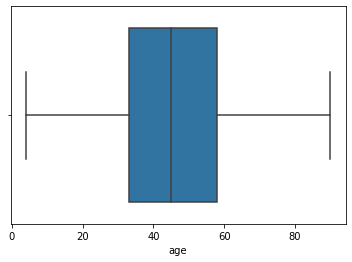

In [ ]:
sns.boxplot(sure['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


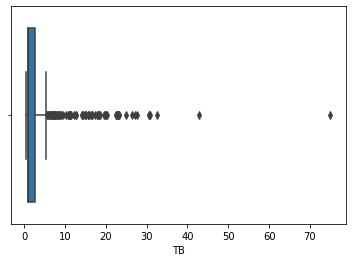

In [ ]:
sns.boxplot(sure['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


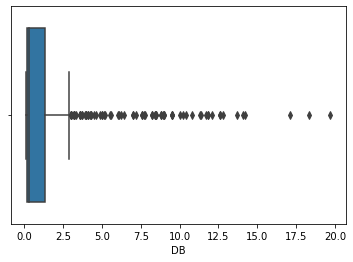

In [ ]:
sns.boxplot(sure['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


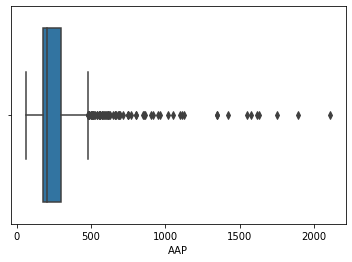

In [ ]:
sns.boxplot(sure['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


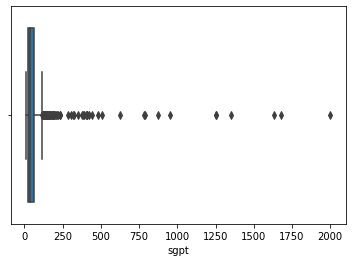

In [ ]:
sns.boxplot(sure['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


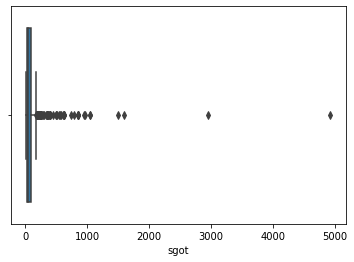

In [ ]:
sns.boxplot(sure['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


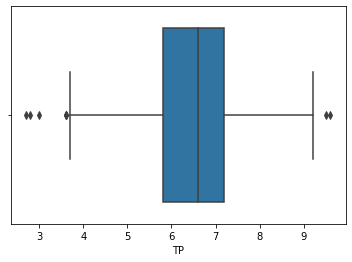

In [ ]:
sns.boxplot(sure['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


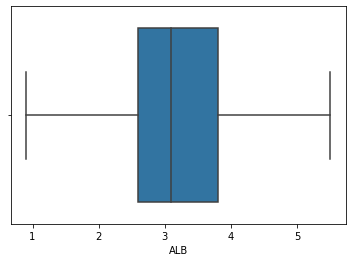

In [ ]:
sns.boxplot(sure['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


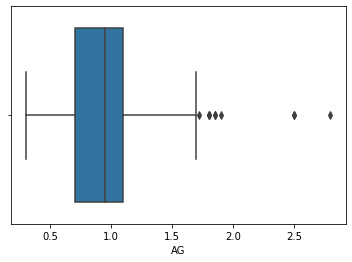

In [ ]:
sns.boxplot(sure['AG'])

#EDA

In [ ]:
toeda = sure.copy()

##For class balance

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


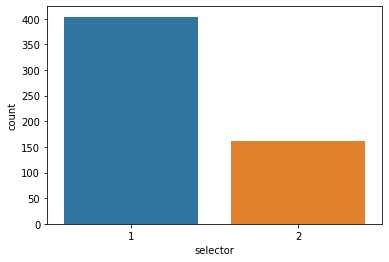

In [ ]:
sns.countplot(toeda['selector'])

In [ ]:
toeda['selector'].value_counts()

1    404
2    162
Name: selector, dtype: int64

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

##Correlation

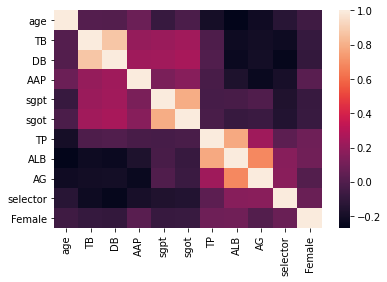

In [ ]:
sns.heatmap(toeda.corr())

In [ ]:
toeda.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,selector,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402,0.005611
selector,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000,0.077396


##Distribution vs optimum

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


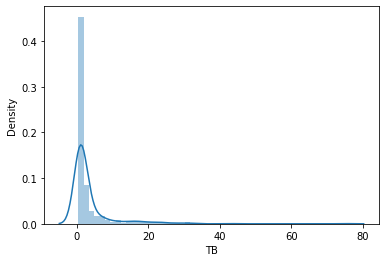

In [ ]:
sns.distplot(toeda['TB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


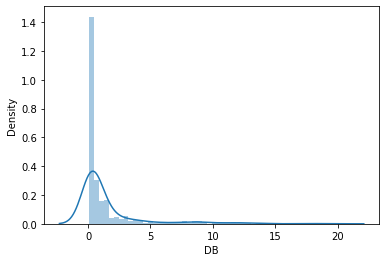

In [ ]:
sns.distplot(toeda['DB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


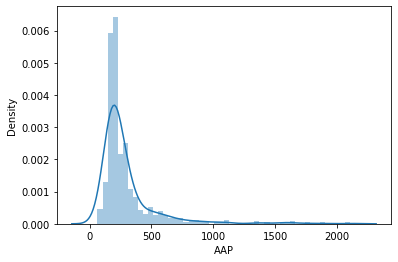

In [ ]:
sns.distplot(toeda['AAP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


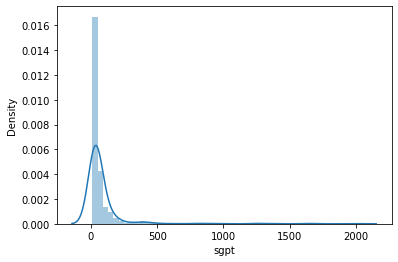

In [ ]:
sns.distplot(toeda['sgpt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


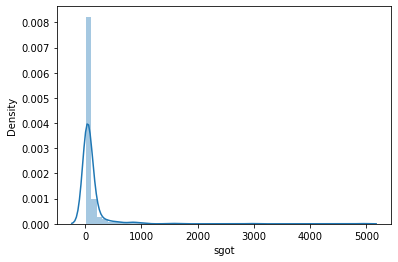

In [ ]:
sns.distplot(toeda['sgot'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


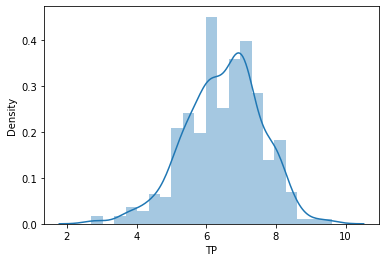

In [ ]:
sns.distplot(toeda['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


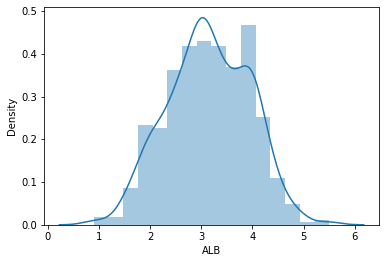

In [ ]:
sns.distplot(toeda['ALB'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


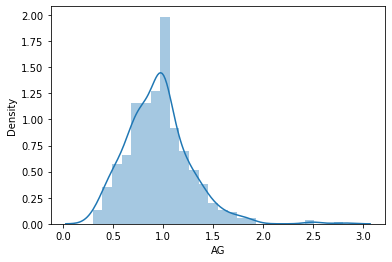

In [ ]:
sns.distplot(toeda['AG'])

#VIF

In [ ]:
# independent_only = data.drop(columns=['Serial No.', 'admit_chance'])

# correlations = independent_only.corr()

# correlations

In [ ]:
# pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [ ]:
correlations = toeda.corr()

In [ ]:
correlations.drop(['selector'], axis=1, inplace=True)
correlations.drop(['selector'], axis=0, inplace=True)

In [ ]:
correlations

,age,TB,DB,AAP,sgpt,sgot,TP,ALB,AG,Female
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.092049
ALB,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.093208
AG,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.005611
Female,-0.057542,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,1.000000


In [ ]:
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

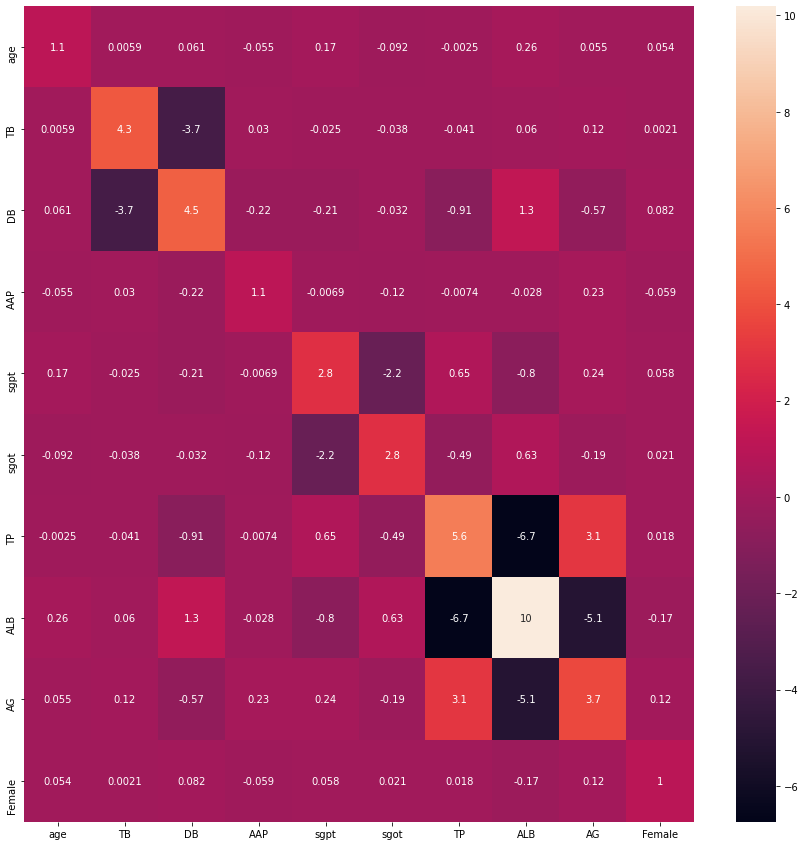

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

In [ ]:
rev = toeda.drop(['ALB','selector'], axis=1)


In [ ]:
correlations = rev.corr()
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [ ]:
vif

,age,TB,DB,AAP,sgpt,sgot,TP,AG,Female
age,1.094204,0.004392,0.028029,-0.054116,0.189147,-0.108248,0.168711,0.183529,0.057995
TB,0.004392,4.256879,-3.681829,0.030356,-0.020103,-0.042154,-0.001678,0.147661,0.003072
DB,0.028029,-3.681829,4.346948,-0.217777,-0.105483,-0.112075,-0.060783,0.070552,0.103114
AAP,-0.054116,0.030356,-0.217777,1.121474,-0.009134,-0.121437,-0.025939,0.213188,-0.059544
sgpt,0.189147,-0.020103,-0.105483,-0.009134,2.755336,-2.149684,0.117533,-0.153296,0.045137
sgot,-0.108248,-0.042154,-0.112075,-0.121437,-2.149684,2.769122,-0.070594,0.120811,0.031625
TP,0.168711,-0.001678,-0.060783,-0.025939,0.117533,-0.070594,1.100568,-0.244321,-0.091732
AG,0.183529,0.147661,0.070552,0.213188,-0.153296,0.120811,-0.244321,1.199799,0.038214
Female,0.057995,0.003072,0.103114,-0.059544,0.045137,0.031625,-0.091732,0.038214,1.029989


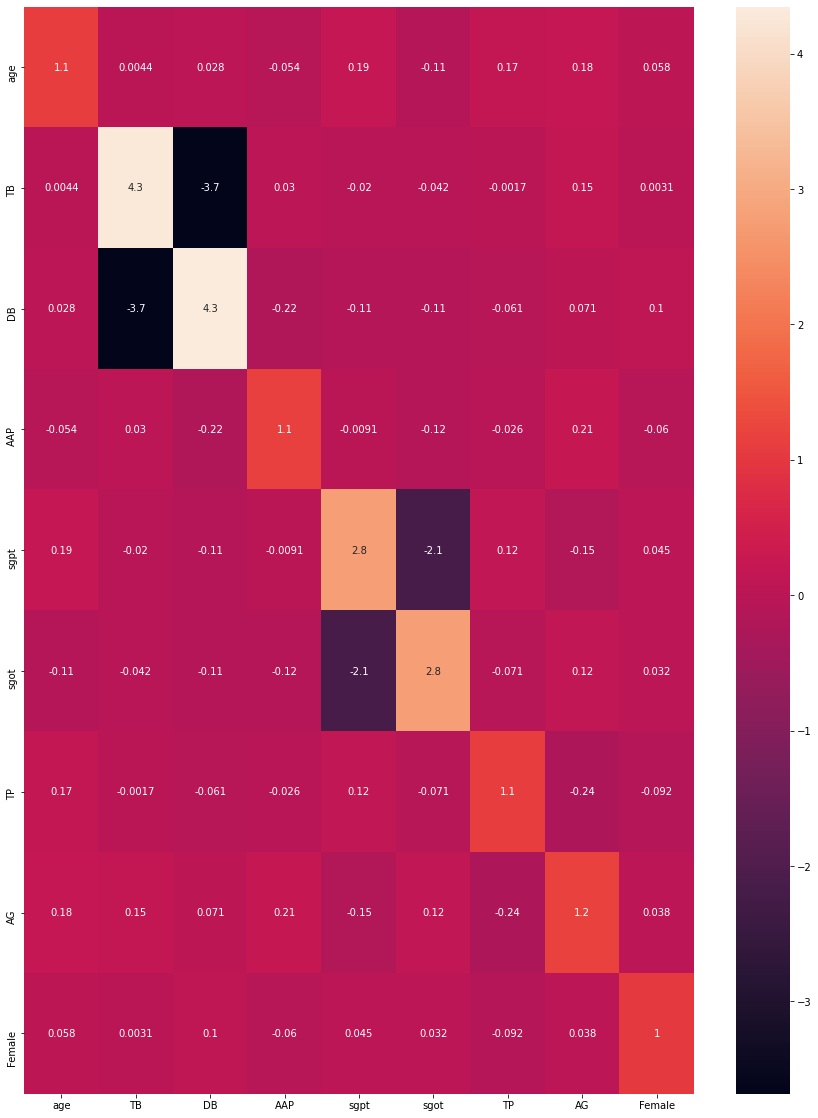

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(vif, annot=True)

plt.show()

## NB
 - Drop ALB

# Models

In [ ]:
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

In [ ]:
y.value_counts()

1    404
2    162
Name: selector, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(y, return_counts=True)

(array([1, 2]), array([162, 162]))

## RandomForestClassifier

In [ ]:
test_features = data.columns.to_list()
test_features.remove('selector')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = 4, 
                           verbose = 2)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

forest = forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.5204081632653061
The confusion matrix:


array([[26, 28],
       [19, 25]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(0,43):
  print(i)
  forest = RandomForestClassifier(n_estimators = 48,
                                  criterion='gini',
                                  random_state = i, 
                                  min_samples_split=4,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  max_depth=4,
                                  class_weight='balanced_subsample'
                                  ) 

  forest = forest.fit(x_train, y_train)
  y_pred = forest.predict(x_test)

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

  

0
Accuracy score of 0.5204081632653061
1
Accuracy score of 0.5
2
Accuracy score of 0.5102040816326531
3
Accuracy score of 0.5102040816326531
4
Accuracy score of 0.5102040816326531
5
Accuracy score of 0.4897959183673469
6
Accuracy score of 0.4897959183673469
7
Accuracy score of 0.4897959183673469
8
Accuracy score of 0.5102040816326531
9
Accuracy score of 0.5306122448979592
10
Accuracy score of 0.5714285714285714
11
Accuracy score of 0.46938775510204084
12
Accuracy score of 0.5510204081632653
13
Accuracy score of 0.5
14
Accuracy score of 0.5408163265306123
15
Accuracy score of 0.5102040816326531
16
Accuracy score of 0.5
17
Accuracy score of 0.47959183673469385
18
Accuracy score of 0.4897959183673469
19
Accuracy score of 0.5612244897959183
20
Accuracy score of 0.5510204081632653
21
Accuracy score of 0.5
22
Accuracy score of 0.4897959183673469
23
Accuracy score of 0.5306122448979592
24
Accuracy score of 0.5204081632653061
25
Accuracy score of 0.46938775510204084
26
Accuracy score of 0.5
27

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 90, 
                               random_state = 42, 
                               min_samples_split= 8,
                               min_samples_leaf= 4,
                               max_features='sqrt',
                               max_depth = 90,
                               class_weight='balanced_subsample',
                               n_jobs = -1
                               ) 

forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.5
The confusion matrix:


array([[23, 31],
       [18, 26]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

Accuracy score of 0.6461538461538462
The confusion matrix:


array([[31,  3],
       [20, 11]])

In [ ]:
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           1       0.61      0.91      0.73        34
           2       0.79      0.35      0.49        31

    accuracy                           0.65        65
   macro avg       0.70      0.63      0.61        65
weighted avg       0.69      0.65      0.61        65



## FP

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(x_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5102040816326531


In [ ]:
# KNN
X = toeda.drop(['selector', 'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

Accuracy score of 0.676923076923077


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Naive Bay Multi
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']

from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

Accuracy score of 0.6615384615384615


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Naive Bay GU
X = toeda.drop(['selector',  'ALB'], axis=1)
y = toeda['selector']


from imblearn.under_sampling import NearMiss

nm = NearMiss(random_state=42)
X, y = nm.fit_sample(X, y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() 
model = clf.fit(x_train, y_train)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

Accuracy score of 0.6461538461538462


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
